# Les catégories

## Imports

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
fr_videos = pd.read_csv("../data/FRvideos.csv")

In [13]:
fr_cat = pd.read_json("../data/FR_category_id.json")

### création d'une liste de catégories

In [16]:
fr_cat_list = []
for x in range(fr_cat.shape[0]):
    d = fr_cat.iloc[x,2]["snippet"]["title"]
    fr_cat_list.append(d)
print(fr_cat_list)

['Film & Animation', 'Autos & Vehicles', 'Music', 'Pets & Animals', 'Sports', 'Short Movies', 'Travel & Events', 'Gaming', 'Videoblogging', 'People & Blogs', 'Comedy', 'Entertainment', 'News & Politics', 'Howto & Style', 'Education', 'Science & Technology', 'Movies', 'Anime/Animation', 'Action/Adventure', 'Classics', 'Comedy', 'Documentary', 'Drama', 'Family', 'Foreign', 'Horror', 'Sci-Fi/Fantasy', 'Thriller', 'Shorts', 'Shows', 'Trailers']


### Traduire les noms des catégories

Film et animation
Autos et véhicules
La musique
Animaux et animaux
Des sports
Courts métrages
Voyages et événements
Gaming
Vidéoblogging
Personnes et blogs
La comédie
Divertissement
Actualités et politique
Comment styliser
Éducation
Technologie scientifique
Films
Anime / Animation
Action / aventure
Classiques
La comédie
Documentaire
Drame
Famille
Étranger
Horreur
Science-fiction / Fantaisie
Thriller
Short
Spectacles
Bandes annonces

# ?
a quoi correspond la catégorie "Foreign" (Étranger)

### intégration de la liste dans le DataFrame fr_videos

In [17]:
fr_videos["category"] = ""
for x in range(len(fr_cat_list)):
    filtre = fr_videos["category_id"] == x
    fr_videos["category"][filtre] = fr_cat_list[x]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [19]:
fr_videos.head(2)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category
0,Ro6eob0LrCY,17.14.11,Malika LePen : Femme de Gauche - Trailer,Le Raptor Dissident,24,2017-11-13T17:32:55.000Z,"Raptor""|""Dissident""|""Expliquez""|""moi""|""cette""|...",212702,29282,1108,3817,https://i.ytimg.com/vi/Ro6eob0LrCY/default.jpg,False,False,False,Dimanche.\n18h30.\nSoyez présents pour la vidé...,Foreign
1,Yo84eqYwP98,17.14.11,"LA PIRE PARTIE ft Le Rire Jaune, Pierre Croce,...",Le Labo,24,2017-11-12T15:00:02.000Z,[none],432721,14053,576,1161,https://i.ytimg.com/vi/Yo84eqYwP98/default.jpg,False,False,False,Le jeu de société: https://goo.gl/hhG1Ta\n\nGa...,Foreign


## Visualisation

### Nombres de vidéos par catégories (avec seaborn)

Text(0.5, 1.0, 'Nombres de vidéos par catégories')

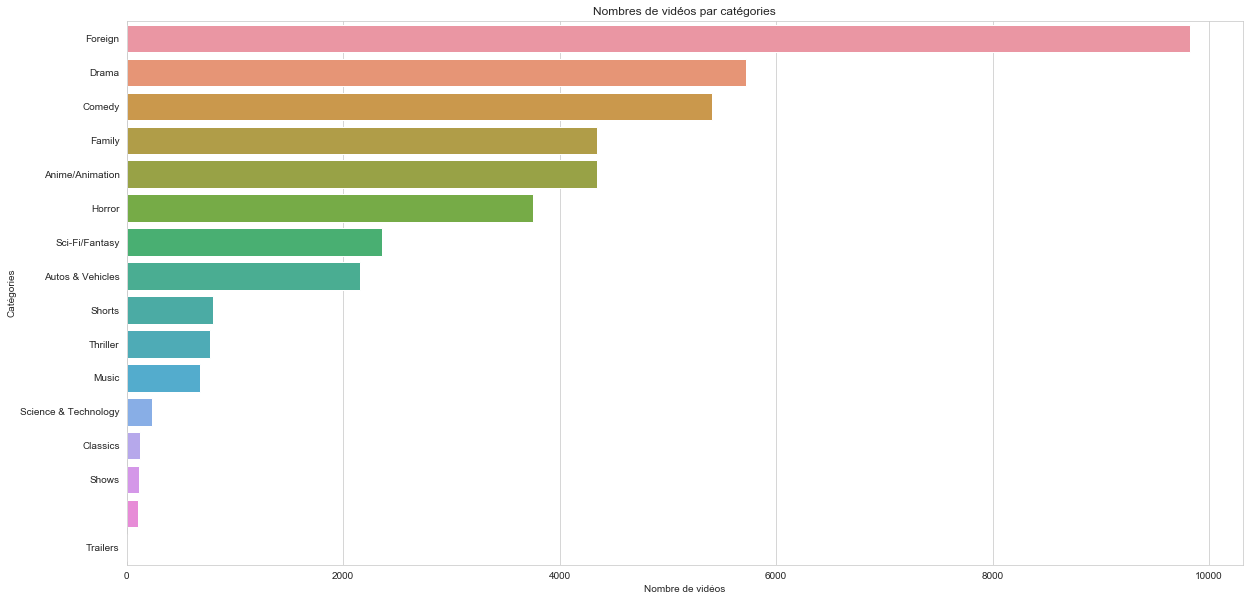

In [25]:
cat_df_fr = fr_videos['category'].value_counts().reset_index()
plt.figure(figsize=(20,10))
sns.set_style("whitegrid")
ax = sns.barplot(y=cat_df_fr['index'],x=cat_df_fr['category'], data=cat_df_fr,orient='h')
plt.xlabel("Nombre de vidéos")
plt.ylabel("Catégories")
plt.title("Nombres de vidéos par catégories")

In [29]:
fr_videos['views_log'] = np.log(fr_videos['views'] + 1)

Vidéos par catégorie (nb)
Foreign            9819
Drama              5719
Comedy             5405
Family             4343
Anime/Animation    4342
Name: category, dtype: int64


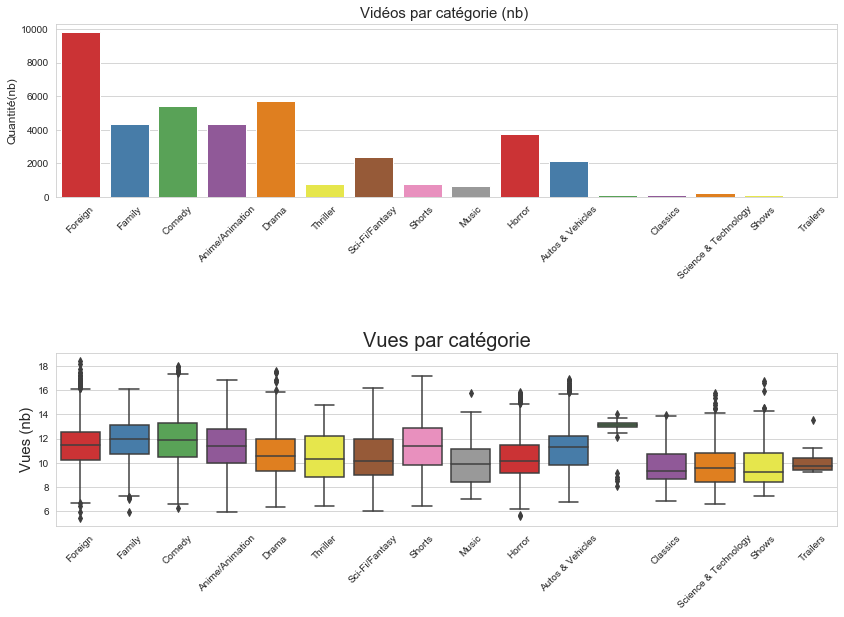

In [30]:
print("Vidéos par catégorie (nb)")
print(fr_videos.category.value_counts()[:5])

plt.figure(figsize = (14,9))

plt.subplot(211)
g = sns.countplot('category', data=fr_videos, palette="Set1")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Vidéos par catégorie (nb) ", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Quantité(nb)", fontsize=12)

plt.subplot(212)
g1 = sns.boxplot(x='category', y='views_log', data=fr_videos, palette="Set1")
g1.set_xticklabels(g.get_xticklabels(),rotation=45)
g1.set_title("Vues par catégorie", fontsize=20)
g1.set_xlabel("", fontsize=15)
g1.set_ylabel("Vues (nb)", fontsize=15)

plt.subplots_adjust(hspace = 0.9, top = 0.9)

plt.show()